<a href="https://colab.research.google.com/github/almazav/Masters-Project/blob/main/Initial_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#plot parameters
FIGSIZE = (14,7)
FIG_TITLE = 22
FIG_AXIS = 14
FIG_LEGEND = 12

# EDA Train Data
Each event contains 4 files:
* hits
* cells
* truth
* particles.

## Hits

In [3]:
df_hits = pd.read_csv('/content/drive/MyDrive/train_100_events/event000001000-hits.csv')
df_hits['radius'] = np.sqrt(df_hits.x**2 + df_hits.y**2)
df_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,radius
0,1,-64.4099,-7.163700,-1502.5,7,2,1,64.807051
1,2,-55.3361,0.635342,-1502.5,7,2,1,55.339747
2,3,-83.8305,-1.143010,-1502.5,7,2,1,83.838292
3,4,-96.1091,-8.241030,-1502.5,7,2,1,96.461773
4,5,-62.6736,-9.371200,-1502.5,7,2,1,63.370336


In [26]:
#df_hits.info()

In [5]:
#find range of x,y, and z
print(f'X range: {min(df_hits.x),max(df_hits.x)}')
print(f'Y range: {min(df_hits.y),max(df_hits.y)}')
print(f'Z range: {min(df_hits.z),max(df_hits.z)}')

X range: (-1024.84, 1025.33)
Y range: (-1025.11, 1024.85)
Z range: (-2955.5, 2955.5)


In [6]:
#unique volume, layer and module ids
print(f'The volume ids(numerical identifier of the detector group) are: {df_hits.volume_id.unique()}')
print(f'The layer ids are( numerical identifier of the detector layer inside the group): {df_hits.layer_id.unique()}')
print(f'The module ids are(numerical identifier of the detector module inside the layer): {df_hits.module_id.unique()}')


The volume ids(numerical identifier of the detector group) are: [ 7  8  9 12 13 14 16 17 18]
The layer ids are( numerical identifier of the detector layer inside the group): [ 2  4  6  8 10 12 14]
The module ids are(numerical identifier of the detector module inside the layer): [   1    2    3 ... 3189 3191 3192]


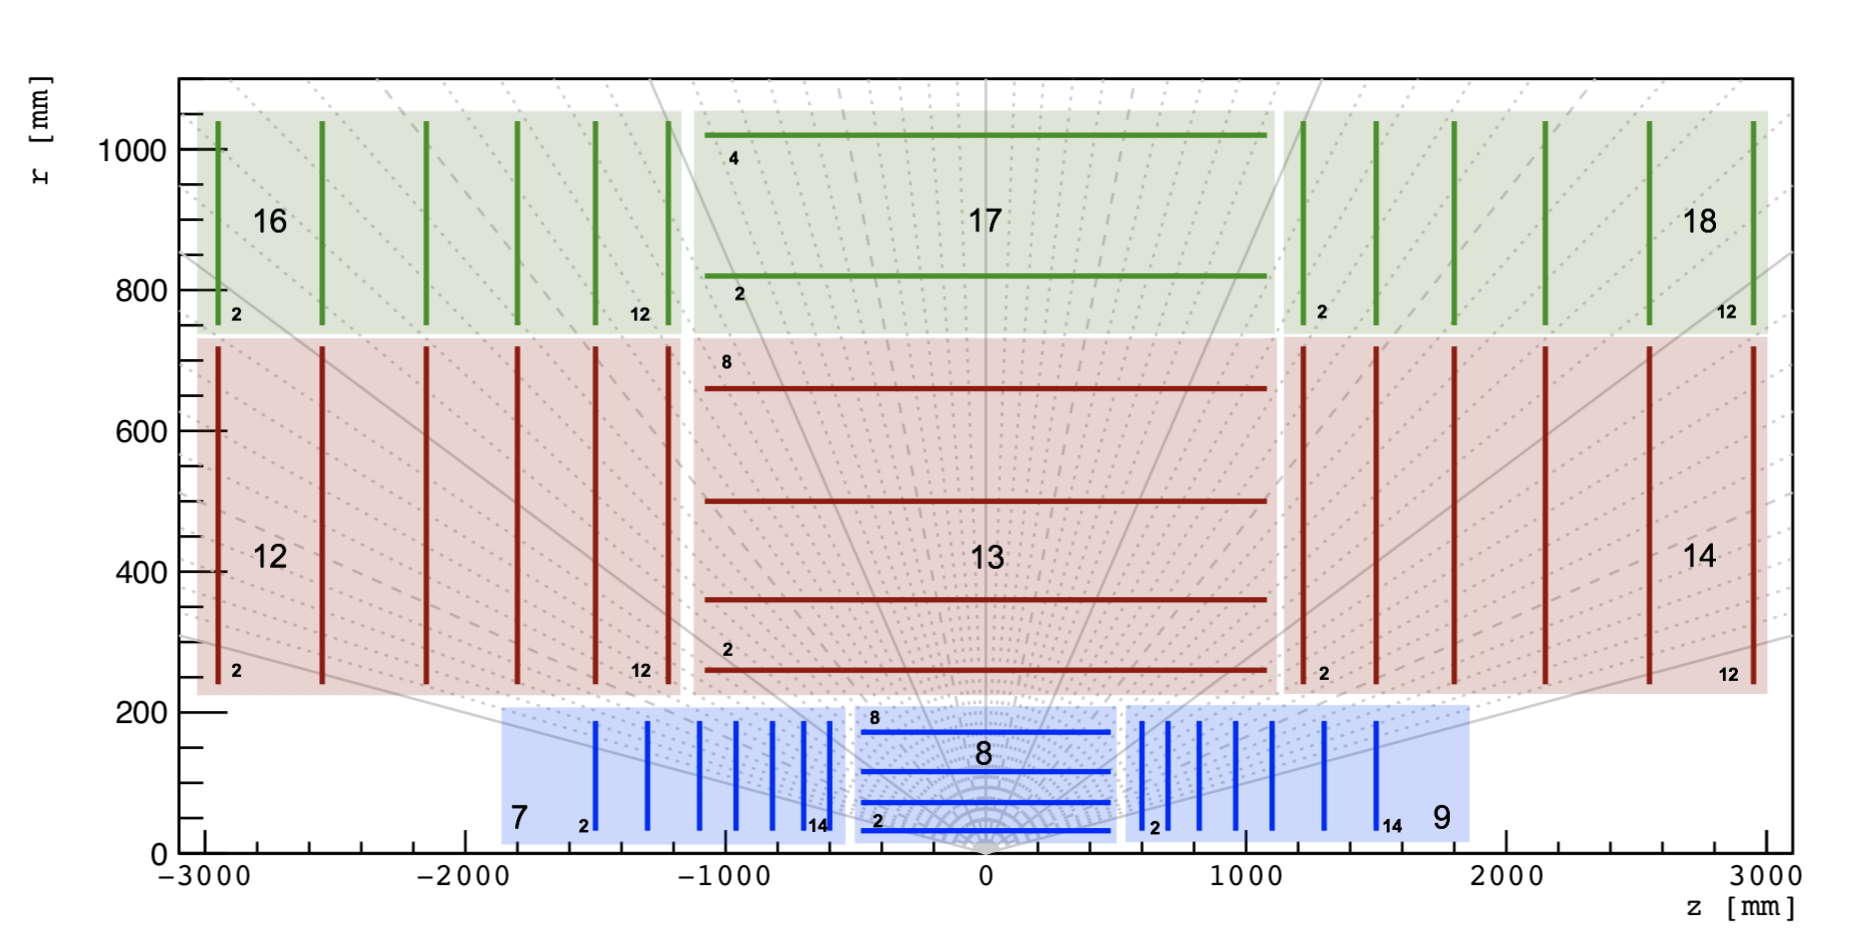

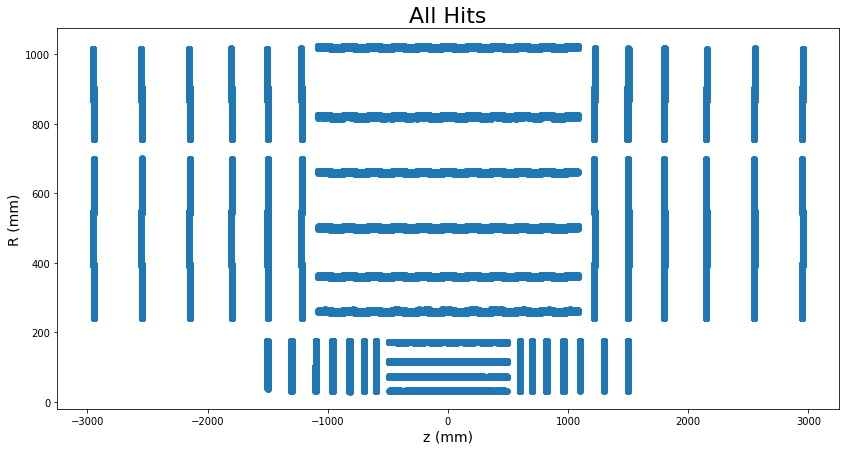

In [7]:
#plot all radius
fig, ax = plt.subplots(figsize = FIGSIZE)
ax.scatter(df_hits.z,df_hits.radius)
ax.set_title('All Hits', fontsize = FIG_TITLE)
ax.set_xlabel('z (mm)', fontsize = FIG_AXIS)
ax.set_ylabel('R (mm)', fontsize = FIG_AXIS)
plt.show()

## Cells
The cells file contains the constituent active detector cells that comprise each hit. The cells can be used to refine the hit to track association. A cell is the smallest granularity inside each detector module, much like a pixel on a screen, except that depending on the volume_id a cell can be a square or a long rectangle.

In [8]:
df_cells = pd.read_csv('/content/drive/MyDrive/train_100_events/event000001000-cells.csv')
df_cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


 It is identified by two channel identifiers that are unique within each detector module and encode the position, much like column/row numbers of a matrix. 

In [9]:
print(f"""In an event with {len(df_cells.hit_id.unique())} recorded hits
there are {len(df_cells.ch0.unique())} chanel 0 
and {len(df_cells.ch1.unique())} chanel 1""")

In an event with 120939 recorded hits
there are 1194 chanel 0 
and 1280 chanel 1


A cell can provide signal information that the detector module has recorded in addition to the position. Depending on the detector type only one of the channel identifiers is valid, e.g. for the strip detectors, and the value might have different resolution.

In [10]:
df_cells.loc[df_cells.hit_id==1]

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723


## Truth
 A value of 0 means that the hit did not originate from a reconstructible particle, but e.g. from detector noise.

In [11]:
df_truth = pd.read_csv('/content/drive/MyDrive/train_100_events/event000001000-truth.csv')
df_truth['radius'] = np.sqrt(df_truth.tx**2 + df_truth.ty**2)
df_truth = df_truth.loc[df_truth.particle_id!=0]
df_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,radius
1,2,22525763437723648,-55.3385,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010,55.342095
3,4,297237712845406208,-96.1229,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008,96.474612
4,5,418835796137607168,-62.6594,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009,63.356861
5,6,108087696726949888,-57.0856,-8.189710,-1502.5,-0.401129,-0.035276,-10.46690,0.000008,57.670071
6,7,968286151951515648,-73.8608,-2.575860,-1502.5,-0.442662,-0.036969,-9.13010,0.000007,73.905702


In [12]:
#how many particle ids
print(f'In an event with {max(df_truth.hit_id)} hits, there are {len(df_truth.particle_id.unique())} unique particles i.e. tracks')


In an event with 120939 hits, there are 10565 unique particles i.e. tracks


In [13]:
# find one particle

df_one_test = df_truth.loc[df_truth['particle_id'] ==22525763437723648]

df_one_test

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,radius
1,2,22525763437723648,-55.3385,0.630805,-1502.5,-0.570605,0.028390,-15.4922,0.000010,55.342095
1419,1420,22525763437723648,-55.1544,0.621779,-1497.5,-0.569794,0.027264,-15.4928,0.000008,55.157905
1459,1460,22525763437723648,-47.9881,0.315591,-1302.5,-0.568883,0.021994,-15.4929,0.000006,47.989138
3169,3170,22525763437723648,-47.8041,0.308733,-1297.5,-0.571445,0.020847,-15.4933,0.000005,47.805097
3233,3234,22525763437723648,-40.6261,0.087326,-1102.5,-0.569940,0.015274,-15.4934,0.000005,40.626194
5342,5343,22525763437723648,-40.4422,0.082538,-1097.5,-0.570204,0.013872,-15.4940,0.000006,40.442284
5423,5424,22525763437723648,-35.4759,-0.024284,-962.5,-0.569773,0.010668,-15.4940,0.000009,35.475908
5481,5482,22525763437723648,-35.3101,-0.027160,-958.0,-0.571644,0.008881,-15.4949,0.000011,35.310110
7866,7867,22525763437723648,-35.2917,-0.027451,-957.5,-0.571617,0.009012,-15.4950,0.000014,35.291711
7950,7951,22525763437723648,-30.3154,-0.095482,-822.5,-0.570993,0.006230,-15.4951,0.000016,30.315550


In [14]:
print(f'For the particle id 22525763437723648 we should see {len(df_one_test)} hits')

For the particle id 22525763437723648 we should see 10 hits


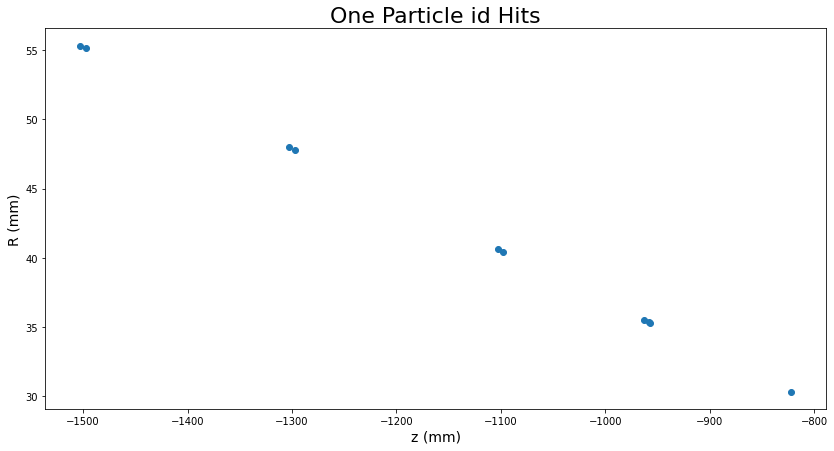

In [15]:
#plot
fig, ax = plt.subplots(figsize = FIGSIZE)
ax.scatter(df_one_test.tz,df_one_test.radius)
ax.set_title('One Particle id Hits', fontsize = FIG_TITLE)
ax.set_xlabel('z (mm)', fontsize = FIG_AXIS)
ax.set_ylabel('R (mm)', fontsize = FIG_AXIS)
plt.show()

From the plot it seams that the particle hits 5 volumes, the double or triple hits might come from the particle hitting the layers within the volumes.  

In [16]:
# lets find partilces that hit volumes 8, 13, and 17
# find z range for volume 8 
df_vol8 = df_hits.loc[df_hits.volume_id==8]
df_vol8_max = max(df_vol8.z)       # max(df_vol8.z)# = 490.782     
df_vol8_min = min(df_vol8.z)       #min(df_vol8.z = -490.777       

# #find all the particles in df_truth within the df_vol8_max and df_vol8_min z range 
particle_ids = []
for particle in df_truth['particle_id'].unique():
  if (max(df_truth.loc[df_truth.particle_id==particle].tz) <= df_vol8_max) & (min(df_truth.loc[df_truth.particle_id==particle].tz) >= df_vol8_min):
    particle_ids.append(particle)
particle_ids = np.array(particle_ids)

In [17]:
#choose 20 random particles in df_truth_v8
ran_part = np.random.randint(0,len(particle_ids),6)
particle_ids = particle_ids[ran_part]


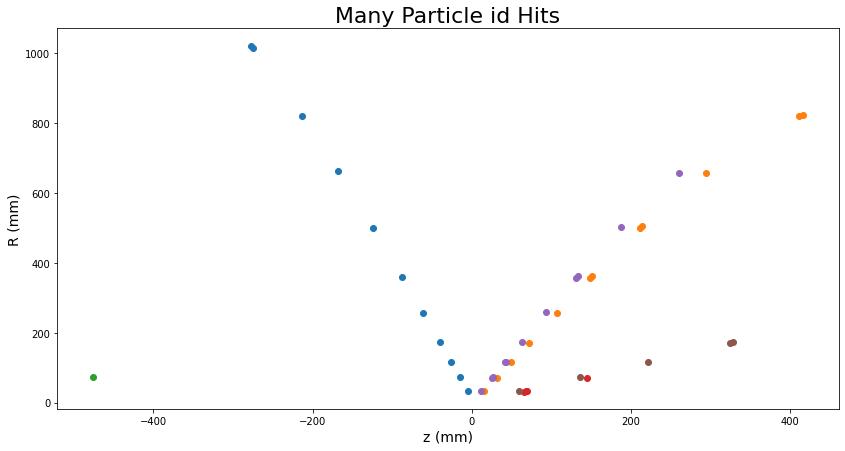

In [18]:
#plot the truth tracks 
fig, ax = plt.subplots(figsize = FIGSIZE)
for particle in particle_ids:
  ax.scatter(df_truth.loc[df_truth.particle_id==particle].tz,df_truth.loc[df_truth.particle_id==particle].radius)
ax.set_title('Many Particle id Hits', fontsize = FIG_TITLE)
ax.set_xlabel('z (mm)', fontsize = FIG_AXIS)
ax.set_ylabel('R (mm)', fontsize = FIG_AXIS)
plt.show()



## Particles 
Contains generated data from the truth file with initial momentum, initial velocity, charge and total hits.

In [19]:
df_particles = pd.read_csv('/content/drive/MyDrive/train_100_events/event000001000-particles.csv')
df_particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824900,1,3


In [20]:
#lets check our previous particle 22525763437723648
df_particles.loc[df_particles.particle_id == 22525763437723648]

,particle_id,vx,vy,vz,px,py,pz,q,nhits
520,22525763437723648,-0.015802,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10


# EDA Test Data
Each event contains 2 files:
* cells
* hits


## Cells

In [21]:
df_test_cells = pd.read_csv('/content/drive/MyDrive/test/test/event000000000-cells.csv')
df_test_cells.head()

,hit_id,ch0,ch1,value
0,1,155,550,0.268630
1,2,180,978,0.316736
2,3,0,214,0.241720
3,4,15,570,0.277643
4,5,275,655,0.083079


## Hits

In [22]:
df_test_hits = pd.read_csv('/content/drive/MyDrive/test/test/event000000000-hits.csv')
df_test_hits['radius'] = np.sqrt(df_test_hits.x**2 + df_test_hits.y**2)
df_test_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,radius
0,1,-60.8267,-4.16023,-1502.5,7,2,1,60.968803
1,2,-84.7294,-7.29528,-1502.5,7,2,1,85.042885
2,3,-42.5930,5.04875,-1502.5,7,2,1,42.891182
3,4,-62.4975,2.72992,-1502.5,7,2,1,62.557094
4,5,-66.2037,-10.60120,-1502.5,7,2,1,67.047113


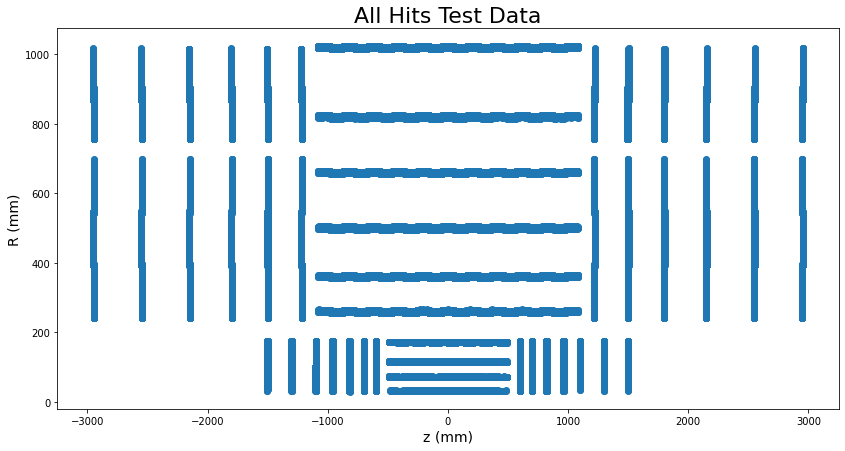

In [23]:
fig, ax = plt.subplots(figsize = FIGSIZE)
ax.scatter(df_test_hits.z,df_test_hits.radius)
ax.set_title('All Hits Test Data', fontsize = FIG_TITLE)
ax.set_xlabel('z (mm)', fontsize = FIG_AXIS)
ax.set_ylabel('R (mm)', fontsize = FIG_AXIS)
plt.show()

# EDA Sample Submission Data
The submission file must associate each hit in each event to one and only one reconstructed particle track.

In [24]:
df_sub = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
df_sub.head()

,event_id,hit_id,track_id
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


In [25]:
df_sub_ev0 = df_sub.loc[df_sub.event_id==0]
df_sub_ev0.head()

,event_id,hit_id,track_id
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


# Conclusions
After the EDA we can see that the test file contains the following data:
* hits positions (feature)
* hits id (nodes)
* chanels (feature)
* signal (feature)



By analysing the submission file is possoble to understand better the aim of the project, we need to map a track id (edge) to a hit id(node) given the previously mentioned features. For a start I wil be focuisng only with the position data, later on I will try to include the chanels and signal.<br> As the track reconstruction is actually the aim of the whole project (as i understand it form the data), I outline my vission of the following steps(week 02/05 to 08/05).
<br> Next step are:
* Transform the truth data into a graph format
* Check the track reconstruction algorithm from https://github.com/GageDeZoort/interaction_network_paper.git
* Look fro other resources like https://towardsdatascience.com/seal-link-prediction-explained-6237919fe575